Tutorial:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd


In [ ]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

# Compute the mean of target and subtract from target
F0 = np.mean(Y)
print(F0)

# Build and train the simple Regression Model with DT
regre = DecisionTreeRegressor(max_depth=1)
regre.fit(X.reshape(-1, 1), (Y-F0).reshape(-1, 1))


# Draw graph
dot_data = export_graphviz(regre, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('simple_reg_tree_step1.png')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

iteration = 5
F = np.zeros((iteration+1, len(Y)))
for i in range(iteration):
    regre = DecisionTreeRegressor(max_depth=1)
    if i == 0:
        F[i] = np.mean(Y)
    regre.fit(X.reshape(-1, 1), (Y-F[i]).reshape(-1, 1))
    F[i+1] = F[i] + regre.predict(X.reshape(-1, 1))
    
    

plt.plot(X, F[-1])
plt.scatter(X, Y)
plt.show()

In [ ]:
for i in range(len(F)):
    if i == 0:
        print(F[i])

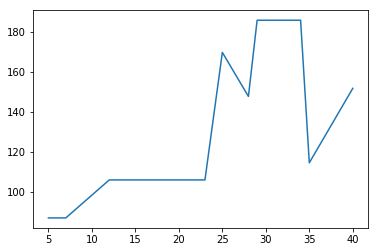

In [17]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

# Compute the mean of target and subtract from target
F = np.mean(Y)

iterations = 10

regre = DecisionTreeRegressor(max_depth=1)
regre.fit(X.reshape(-1, 1), (Y - F).reshape(-1, 1))


# Build and train the simple Regression Model with DT
for value in range(iterations):
    h = regre.predict(X.reshape(-1, 1))
    F += h
    regre.fit(X.reshape(-1, 1), (Y-F).reshape(-1, 1))


plt.plot(X, F)


In [7]:
h

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')